In [6]:
# Code to scrape Instagram and retrieve comments from a NOS ALIVE post 
# Response was 85 comments (one of them was empty)

import instaloader

loader = instaloader.Instaloader()

loader.login('username', 'password')   # we have to login with an instagram account

# Write the shortcode of the post that we want
shortcode = 'C4K7P4Js7p6' 

# Get the post using the shortcode using InstaLoader
post = instaloader.Post.from_shortcode(loader.context, shortcode)

# Retrieve comments from that post
comments = []
for comment in post.get_comments():
    comments.append(comment.text)

# Print them
for idx, comment in enumerate(comments, start=1):
    print(f"Comment {idx}: {comment}")

Comment 1: Mudem o slogan para o pior cartaz de sempre. O dia 12 então é assustador, tão mau tão mau que chega a ser embaraçoso e uma afronta para quem como eu comprou o passe de 3 dias
Comment 2: Imaginem a dua lipa dividir o palco com trex e tyla???💀💀😭
Comment 3: eish, não gostaram dos comentários negativos do outro post?
Comment 4: Quando meterem o post com o cartaz a sério não se esqueçam de apagar este outra vez
Comment 5: Quando anunciam o restante cartaz do palco NOS para o dia 12?
Comment 6: Talvez o pior cartaz de sempre
Comment 7: Onde estão os artistas tugas? Tá muito fraco 😒
Comment 8: Pls bring The Killers, they are performing in Madcool in Madrid the same days, so they are close to Lisbon to come. Talk to them!!! 😭🥰🤘🏽
Comment 9: Quando confirmam os Foo Fighters?
Comment 10: A Tyla cancelou toda a tour. Vão devolver o dinheiro se o substituto não interessar?
Comment 11: Realmente Water bombou, mas ao ponto de meter Tyla como um dos destaques da edição… 😶‍🌫️
Comment 12: And

In [7]:
# Code that creates a CSV file where one column is the original version of the comments (in portuguese)
# another column is the translated version of the comments (in english) (translated using Google Translate API)
# and the final column is the sentiment score for the comment (using TextBlob on the english version of the comments)

from googletrans import Translator
from textblob import TextBlob
import csv

portuguese_comments = [
    "Dia 12 tá péssimo, quando anunciam algo? Senão mais vale tornarem show solo da dua lipa",
    "Onde estão os artistas tugas? Tá muito fraco 😒",
    "I'm looking for two three-day passes",
    "Talvez o pior cartaz de sempre",
    "eish, não gostaram dos comentários negativos do outro post?",
    "A Tyla cancelou toda a tour. Vão devolver o dinheiro se o substituto não interessar?",
    "Quando meterem o post com o cartaz a sério não se esqueçam de apagar este outra vez",
    "Quando anunciam o restante cartaz do palco NOS para o dia 12?",
    "Many more to be announced there is still hope, guys!! 🤞",
    "Estou à espera de @foofighters e de @greenday para este cartaz !!!",
    "Vou ao @nos_alive desde a 2a edição, e de facto sempre tiverem alguns dos melhores cartazes de todos os festivais. Mas este ano é de longe o pior cartaz que já apresentaram, não dá sequer para justificar pagar 190€ por 3 dias, quando tinham cartazes mais fortes com passes a 90€. Meterem Tyla no palco principal nem faz sentido, uma artista com um hit viral, que nem um álbum tem editado, nem teve tempo para provar ser merecedora de partilhar um main stage como headliner… enfim, fico mesmo desapontado com estas escolhas. Felizmente temos o @meokalorama atualmente a fazer a diferença nos cartazes e a um preço muito mais honesto para o que oferecem, algo que o Alive já fez no passado mas pelo qual perdeu o interesse.",
    "Anunciem lá os @bringmethehorizon !",
    "Eu gostava de ter bilhete para o dia 13. Mas anyway, acho que vou morrer sem ver a minha banda favorita @ricardo.mso.henriques",
    "@avrillavigne dia 12?",
    "Honestly só comprei o bilhete pela Dua Lipa, mas cmon guys que cartaz é este este ano :/",
    "Andam a apagar os comentários negativos e bloquear os fãs do evento que inclusive já até pagaram o ingresso. Que feio em @nos_alive .",
    "Pls bring The Killers, they are performing in Madcool in Madrid the same days, so they are close to Lisbon to come. Talk to them!!! 😭🥰🤘🏽",
    "Este dia 13 apesar de ter Pearl Jam como grandissimo nome claro, de resto continua muito fraquinho...",
    "Quando confirmam os Foo Fighters?",
    "aurora ❤",
    "Falta Future Islands no sábado!",
    "Fraco! Tão ruim quanto o Rock in Rio! Paredes de Coura e Kalorama estão muito melhores!",
    "Imaginem a dua lipa dividir o palco com trex e tyla???💀💀😭",
    "Eu gostava de ter 2 bilhetes para o dia 13",
    "Tudo bem que water foi hit mas assim a Tyla não tem nem álbum lançado e vai para o palco NOS? Anunciem logo outro headliner pro dia 12",
    "quando anunciam a @charli_xcx para dia 12????",
    "Não adianta demonstrar insatisfação e fazer comentários negativos, pois a @nos_alive está ocultando/bloqueando quem os faz aqui nos comentários... realmente muito feio isto!",
    "A aguardar confirmação para Renee Rapp!",
    "Melhor cartaz sempre! (menos de 2024 que está muito fraquinho) 😂",
    "Dia 12 e de chorar, meu Deus ,pessimo cast nesse dia",
    "To aguardando @bringmethehorizon ❤️",
    "Pearl Jam ❤️",
    "Queremos Charli XCX dia 12👀",
    "Mudem o slogan para o pior cartaz de sempre. O dia 12 então é assustador, tão mau tão mau que chega a ser embaraçoso e uma afronta para quem como eu comprou o passe de 3 dias",
    "Mais bilhetes para o dia 13 😭😭😭😭😭😭",
    "Pior cartaz de sempre 😢 que desilusão. O cartaz do @superbocksuperrock está muito mas muito melhor",
    "Realmente Water bombou, mas ao ponto de meter Tyla como um dos destaques da edição… 😶‍🌫️",
    "#UMALIVEQUEJÁNÃOÉALIVE",
    "More tickets",
    "😍😍😍😍😍",
    "Melhor cartaz de sempre?!?! Q mentira. Está péssimo!",
    "The 12, nos stage needs some rock",
    "dia 12 está deprimente",
    "Greta VF 🙏🏼!!!!",
    "💩💩💩💩💩",
    "Compro bilhetes para dia 13, dm",
    "É mesmo isso... em contagem decrescente.⚡️🤎🎶",
    "Que cartaz terrivel...pagar 80 euros por isto...",
    "🔥🔥🔥🔥",
    "“Haaaa esse ano está péssimo” então não vai p0rr@ 🙄",
    "Dia 13, gosto daquela banda, os Many more to announced, muito bom... Já está esgotado, fechou a loja",
    "Só este e o pop in rio. Que coisa miserável.",
    "Cadê mais ingresso do Pearl Jam?",
    "Madcool com garbage, the killers e tanta coisa... aqui bastou pj, esgotou e fechou a loja",
    "@gretavanfleet pls",
    "Pra mim so sum 41 vale a pena ver :/ poderia ter mais coisa boa no dia 13",
    "Mais bilhetes para os Pearl Jam!!",
    "Quando é que os bilhetes para esta gesta vao estar disponíveis para levantar no posto de turismo?",
    "o cartaz mais podre que já vi",
    "Se adicionarem Soccer Mommy, Dj Koze e/ou Alvvays ao dia 11 (todos estão no mad cool) não procrastino mais a compra do meu bilhete diário.",
    "q lineup perfeito",
    "Anyone selling 2 tickets for July 11 & 13 ?",
    "Bring Purple disco machine, jungle, justice, the kooks...",
    "Pior cartaz de sempre, preço mais caro de sempre.",
    "@elirato",
    "I'm still looking for tickets for 11 and 13juli.",
    "@andfreire r we going ;)",
    "Trás o @chaseatlantic",
    "On July 11 on the tickets page...why is Arcade Fire not pictured as the headliner or even mentioned? Are they no longer scheduled to play?",
    "Oi! Tô querendo dois ingressos pra todos os três dias. A entrada separada do dia 13 também serve pra gente. 🙏🏼🙏🏼",
    "Is this it? There has to be more nos stage acts",
    "Not 1 positive comment and deservedly so….. apart from Pearl jam the Nos stage is really weak. Shit pop, washed up pop, and has been cock rock. I’ll be in the Heineken Stage for most of the festival and definitely elsewhere next year!!!",
    "Dia 13 só pearl jam, que o resto 👎👎👎👎👎👎👎 nem conheço , muito fraquinho",
    "Então, mas... E o resto do cartaz para dia 13? É isto? 🤔",
    "When is the full lineup going to be out?",
    "Onde posso adquirir um bilhete de 3 dias? Existe alguma lista para as desistências e devoluções de bilhetes?",
    "Só faltava aqui um @noahkahanmusic 🙌🏾",
    "Não podiam juntar os Pearl Jam com os Smashing pumpkins os Arcade fire e a Dua Lipa num só? Isso é que era!😊",
    "Pearl Jam ♥️♥️",
    "Busco 2 abonos!",
    "cadê a avril lavigne?",
    "@everythingisnewpt Olá! Haverá revenda de bilhetes dia 13?",
    "Anyone needs ti.xxx🎟️",
    "That's it?"
]

# A function to translate comments from Portuguese to English using Google Translate API
def translate_to_english(comment):
    try:
        translator = Translator()
        translated_comment = translator.translate(comment, src='pt', dest='en').text
        return translated_comment
    except Exception as e:   # this is just to know if there is an error in the translation of a comment
        print(f"Error translating comment: {comment}")
        print(f"Error message: {e}")
        return ""

# A function to perform sentiment analysis using TextBlob
def analyze_sentiment(comment):
    blob = TextBlob(comment)
    sentiment_score = blob.sentiment.polarity
    return sentiment_score

# Translate comments, perform the sentiment analysis and write to CSV file
with open('comments_analysis_nos_alive.csv', 'w', newline='', encoding='utf-8') as csvfile:
    fieldnames = ['Portuguese Comment', 'Translated Comment', 'Sentiment Score']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    
    for comment in portuguese_comments:
        translated_comment = translate_to_english(comment)
        if translated_comment:
            sentiment_score = analyze_sentiment(translated_comment)  # Analyze sentiment based on translated comment
            writer.writerow({'Portuguese Comment': comment, 'Translated Comment': translated_comment, 'Sentiment Score': sentiment_score})
        else:
            writer.writerow({'Portuguese Comment': comment, 'Translated Comment': "Translation Error", 'Sentiment Score': 0})

In [4]:
import pandas as pd
df_alive = pd.read_csv('comments_analysis_nos_alive.csv')
df_alive.head(10)

,Portuguese Comment,Translated Comment,Sentiment Score
0,"Dia 12 tá péssimo, quando anunciam algo? Senão...","Day 12 is terrible, when do you announce somet...",-0.350000
1,Onde estão os artistas tugas? Tá muito fraco 😒,Where are the tugas artists?It's very weak 😒,-0.487500
2,I'm looking for two three-day passes,I'm Looking For Two Three-Day Passes,0.000000
3,Talvez o pior cartaz de sempre,Maybe the worst poster ever,-1.000000
4,"eish, não gostaram dos comentários negativos d...","Eish, didn't you like the negative comments fr...",-0.212500
5,A Tyla cancelou toda a tour. Vão devolver o di...,Tyla canceled the whole tour.Are they going to...,0.200000
6,Quando meterem o post com o cartaz a sério não...,When they get the post with the poster serious...,-0.333333
7,Quando anunciam o restante cartaz do palco NOS...,When do they announce the remaining stage post...,0.000000
8,"Many more to be announced there is still hope,...","Many more to be Anniedd There is Still Hope, G...",0.640625
9,Estou à espera de @foofighters e de @greenday ...,I am waiting for @foofighters and @greenday fo...,0.000000


In [8]:
# Code to scrape Instagram and retrieve comments from a Rock in Rio post 
# Response was 96 comments

import instaloader

# Create an Instaloader instance
loader = instaloader.Instaloader()

loader.login('username', 'password')   # you have to login with an instagram account

# Define the shortcode of the post from which you want to retrieve comments
shortcode = 'C356dBAMGA3'  

# Get the post object using the shortcode
post = instaloader.Post.from_shortcode(loader.context, shortcode)

# Retrieve comments from the post
comments = []
for comment in post.get_comments():
    comments.append(comment.text)

# Print the comments
for idx, comment in enumerate(comments, start=1):
    print(f"Comment {idx}: {comment}")

Comment 1: Europe! 😀👏👏👏👏👏👏
Comment 2: Luisa Sonza no palco Gap eh loucura
Comment 3: Pedro Sampaio e Luísa Sonza no palco galp ??? Deviam de estar no palco mundo !!
Comment 4: Where is Camila Cabello?
Comment 5: Queria mesmo saber os horários, pra saber se vou precisar me dividir entre os palcos kkkkk
Comment 6: Palco secundário está melhor que o palco mundo😂
Comment 7: Europe não estarem no palco principal é escandaloso. 
Vocês não têm noção dos festivais onde eles tocam anualmente por este mundo fora...
No entanto espero que ao menos filmem o concerto, eles merecem.  #queremosEuropenopalcomundo
Comment 8: Uma banda com o tamanho dos europe recambiada para um palco secundário enfim 🤷‍♂️🤷‍♂️
Comment 9: Scorpions! Europe!! Parece o festival do azeite...
Comment 10: Dia 23 tá muitooooo bommm o line up
Comment 11: Luisa merecia palco mundo mas ok, vou ver na mesmaaaa
Comment 12: Dia 23 eu vou gritar tanto, mas tanto omg 🥲
Comment 13: Evanescence??
Comment 14: Dia 15 de Junho é o dia do ve

In [9]:
# Code that creates a csv file where one column is the original version of the comments (in portuguese)
# another column is the translated version of the comments (in english) (translated using Google Translate API)
# and the final column is the sentiment score for the comment (using TextBlob on the english version of the comments)

from googletrans import Translator
from textblob import TextBlob
import csv

# Sample Portuguese comments
portuguese_comments = [
    "Scorpions! Europe!! Parece o festival do azeite...",
    "Hybrid Theory e Europe, sério, eu não teria escolhido melhor dia pra aproveitar meu PRIMEIRO RIR 🥹🤘🏻",
    "Dia 23 eu vou gritar tanto, mas tanto omg 🥲",
    "Yes Carolina de Deus, Diego Miranda no mesmo dia, altamente 🔥👏👏👏",
    "Luisa Sonza no palco Gap eh loucura",
    "Where is Camila Cabello?",
    "Brutal!!! 🔥❤️",
    "Pedro Sampaio e Luísa Sonza no palco galp ??? Deviam de estar no palco mundo !!",
    "Luisa merecia palco mundo mas ok, vou ver na mesmaaaa",
    "Palco galp melhor que o palco principal",
    "Dia 15 de Junho é o dia do verdadeiro ROCK e só vejo gente que tanto reclama do cartaz a dar primazia a outros dias que de rock nada são. A única conclusão a que se pode chegar é que as pessoas gostam apenas de falar mal, criticar e depois estão lá todas como de costume. PARABÉNS @rockinriolisboa pelo cartaz e por aturarem devaneios de gente que nunca está satisfeita.",
    "Quem foi a alminha que se lembrou de pôr os @officialeuropetheband num palco secundário?! Hello?! Lá estarei, mas por favor...",
    "Excelente o dia 23 @ccaataariinaa, mas posso esperar 😁😁",
    "E @fboband2021 ???",
    "ESTA EDIÇÃO ESTÁ INCRÍVEL @rockinriolisboa 🎸❤️‍🔥",
    "Europe 😮‍💨🥹 queria",
    "Uma banda com o tamanho dos europe recambiada para um palco secundário enfim 🤷‍♂️🤷‍♂️",
    "Evanescence??",
    "Palco secundário está melhor que o palco mundo😂",
    "Ai já nem tenho palavras",
    "Europe! 😀👏👏👏👏👏👏",
    "@_mariana.reis_ @inesrrrsantos vai ser do crlhhhhhhh🔥🔥🔥🔥",
    "Queria mesmo saber os horários, pra saber se vou precisar me dividir entre os palcos kkkkk",
    "Europe não estarem no palco principal é escandaloso. Vocês não têm noção dos festivais onde eles tocam anualmente por este mundo fora... No entanto espero que ao menos filmem o concerto, eles merecem.  #queremosEuropenopalcomundo",
    "❤🔥",
    "Meu sonho é trabalhar convosco 🖤❤️",
    "Dia 23 tá muitooooo bommm o line up",
    "Europe , Luísa Sonza, e Pedro Sampaio. Os melhores 🔥🔥🔥",
    "🔥🔥🔥",
    "❤",
    "Que cartaz de merdaaaa",
    "@pipamveloso",
    "Libera o line up do Brasil completo. Que saco 🤬🤬🤬🤬🤬",
    "Luisa Sonza jogará ao mesmo tempo que Aitana? Quero ouvi-los cantar a música amigo de semana junto com Danna 🙏🏻 rainhas🔥",
    "15 será épico! E além das lendas (wow, EUROPE!!!!😍) ainda vou assistir no palco GALP, fenomenal, minha banda favorita, a House Band da @schoolofrockfloripa com @bia.pio no vocal, YOU ROCK ! 🤘🏼🎸😍",
    "Europe não merecia palco mundo?",
    "@erica_figas",
    "Europe no Galp stage é sacanagem",
    "👏👏👏",
    "Perfeição demais",
    "😍😍😍",
    "E as horas de cada show vão dizer por aqui ?",
    "quais sao os horarios?",
    "😍😍❤",
    "Esta melhor este cartaz que o palco mundo 😂",
    "Opa! Europe! Ai sim!",
    "James! 👌👏👏👏",
    "James?",
    "Ai nãooooooooo.. Como não tenho amigos vou sozinha mesmo ver a @luisasonza e o @pedrosampaio .",
    "crazy mm mas onde é que ta o bruno mars? @brunomars",
    "e a line do Brasil nada",
    "Estou muito feliz, vou ver os europe ❤️",
    "E o rock in rio nada né?",
    "🫶🔥",
    "@ruimserafim ❤️😍",
    "Luisa ❤️‍🔥❤️‍🔥❤️‍🔥",
    "👏👏👏👏🙌🙌🙌❤️❤️",
    "E A CAROLINA DESLANDES !!!!!!!!??",
    "Wtf",
    "Camila cabello estava dia 23???",
    "Luiza 💩",
    "@mariaclaro27",
    "Tenho 23 anos e tenho sorte em dizer que VOU VER OS EUROPE 🔥",
    "🔥",
    "Europe!!!!🔥🤘🏼🤘🏼😍😍😍😍😍😍😍",
    "Que tudo 👏👏🔥🔥",
    "Nem Rock nem Rio. 👎🏻 Festival cada vez mais decadente e esquisito.",
    "🤟🏻🤟🏻🔥🔥",
    "JAKE BUGG",
    "Porra que granda merda de cartaz. Até as festas do Crato ou da feira da agricultura de santarém consegue um cartaz melhor que isto. Rock? Onde? Fogo que tristeza. Ainda estão piores que o Sudoeste. Assim não se safam nem se pusessem os bilhetes a 10 paus.",
    "👏",
    "Aitana ?????",
    "Tá compensando bem mais ir pra Lisboa",
    "zara larsson por favor 😭😭😭",
    "Foi só o início. 👀 Vai ser incrível! ⚡️",
    "No Brasil é top… aquí é amostras!",
    "🤮🤮🤮🤮🤮🤮🤮",
    "Dia 15 vai ser foda demais!!!",
    "Europe para o palco galp?",
    "Dia 22 está mesmo pobre",
    "Travis scott??",
    "Podiam ter trazido o Travis também a Portugal",
    "Que merda de cartas façam como o rock in rio brasileiro crlh isto é uma pouca vergonha eles travis scott nos luisa sonza fds assr isto ta cada vez pior so para velhos em portugal",
    "O cartaz em Portugal comparado com o do Brasil é só uma piada",
    "TRAGAM O TRAVIS SCOTT!!!",
    "Europe merece palco mundo! Olha de quem estamos falando, amigos",
    "Só EUROPE se salvou nesses novos nomes para o ROCK in rio.",
    "Queria tanto ver Europe e agora já comprei pra 16 e 22 💔",
    "Alguém para ir comigo ? 😩",
    "Essa Hybrid Theory é a banda cover de @linkinpark ??",
    "Não vai ter Veveta nessa edição??",
    "E o neyo?????",
    "Europe e Luisa deviam estar no palco principal",
    "Festival que não tem rock e não é no rio 😂😂😂😂😂 que piada 😂😂😂😂",
    "Cada vez pior este festival, acho que deveriam mudar o nome para Pop In Rio, seria mais adequado",
    "Ahhh por favor só queria ver Nathan Breves"
]

# A function to translate comments from Portuguese to English using Google Translate API
def translate_to_english(comment):
    try:
        translator = Translator()
        translated_comment = translator.translate(comment, src='pt', dest='en').text
        return translated_comment
    except Exception as e:
        print(f"Error translating comment: {comment}")    # this is just to know if there is an error in the translation of a comment
        print(f"Error message: {e}")
        return ""

# A function to perform sentiment analysis using TextBlob
def analyze_sentiment(comment):
    blob = TextBlob(comment)
    sentiment_score = blob.sentiment.polarity
    return sentiment_score

# Translate comments, perform the sentiment analysis and write to CSV file
with open('comments_analysis_RIR.csv', 'w', newline='', encoding='utf-8') as csvfile:
    fieldnames = ['Portuguese Comment', 'Translated Comment', 'Sentiment Score']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    
    for comment in portuguese_comments:
        translated_comment = translate_to_english(comment)
        if translated_comment:
            sentiment_score = analyze_sentiment(translated_comment)  # Analyze sentiment based on translated comment
            writer.writerow({'Portuguese Comment': comment, 'Translated Comment': translated_comment, 'Sentiment Score': sentiment_score})
        else:
            writer.writerow({'Portuguese Comment': comment, 'Translated Comment': "Translation Error", 'Sentiment Score': 0})

In [10]:
# Code to scrape Instagram and retrieve comments from the MEO Sudoeste post 
# Response was 44 comments (one of them was empty)

import instaloader

# Create an Instaloader instance
loader = instaloader.Instaloader()

loader.login('username', 'password')   # you have to login with an instagram account

# Define the shortcode of the post from which you want to retrieve comments
shortcode = 'C2z5BIlrxyt'  # Replace this with the shortcode of your desired post

# Get the post object using the shortcode
post = instaloader.Post.from_shortcode(loader.context, shortcode)

# Retrieve comments from the post
comments = []
for comment in post.get_comments():
    comments.append(comment.text)

# Print the comments
for idx, comment in enumerate(comments, start=1):
    print(f"Comment {idx}: {comment}")

Comment 1: Anda lá martin 😂
Comment 2: E qual é exatamente?
Comment 3: Isso é POV de quem já tá no festival e já comprou bilhete
Comment 4: agora só falta a confirmação
Comment 5: próxima notícia é alerta CM: tremor na zambujeira
Comment 6: 
Comment 7: não
Comment 8: Este ano está fraco :/
Comment 9: literalmente a minha reação 😂
Comment 10: que eu saiba ainda não é dia 1 de abril 😂
Comment 11: Se houvesse era top
Comment 12: TRAVIS?!
Comment 13: @leticiaa.liima 🔥🔥😍😍😍
Comment 14: @festivalsudoeste para quando essa confirmação??
Comment 15: Martin Garrix @festivalsudoeste


In [ ]:
# Code that creates a csv file where one column is the original version of the comments (in portuguese)
# another column is the translated version of the comments (in english) (translated using Google Translate API)
# and the final column is the sentiment score for the comment (using TextBlob on the english version of the comments)

from googletrans import Translator
from textblob import TextBlob
import csv

portuguese_comments = [
    "Isso é POV de quem já tá no festival e já comprou bilhete",
    "próxima notícia é alerta CM: tremor na zambujeira",
    "E qual é exatamente?",
    "Este ano está fraco :/",
    "TRAVIS?!",
    "não",
    "literalmente a minha reação 😂",
    "agora só falta a confirmação",
    "que eu saiba ainda não é dia 1 de abril 😂",
    "Anda lá martin 😂",
    "Se houvesse era top",
    "Martin Garrix @festivalsudoeste",
    "@festivalsudoeste para quando essa confirmação??",
    "@leticiaa.liima 🔥🔥😍😍😍",
    "🔥🔥",
    "@noahkahanmusic era genial !!!",
    "Martin Garrix 🔥🔥🔥🔥",
    "TRAGAM O FLUME!",
    "@flume !!!!!",
    "➕✖❤😈",
    "O MEO sudoeste mudou de 'dono', então devem estar a tratar ainda de tudo....não sei mas espero que tragam bons artistas ou vão perder mais gente ainda😢",
    "ainda n vi nd",
    "Mas tanto tempo ?"
]

# Translate comment from Portuguese to English using Google Translate API
def translate_to_english(comment):
    try:
        translator = Translator()
        translated_comment = translator.translate(comment, src='pt', dest='en').text
        return translated_comment
    except Exception as e:
        print(f"Error translating comment: {comment}")
        print(f"Error message: {e}")
        return ""

# Analyze sentiment using TextBlob
def analyze_sentiment(comment):
    blob = TextBlob(comment)
    sentiment_score = blob.sentiment.polarity
    return sentiment_score

# Translate comments and write to CSV file
with open('comments_analysis_sudoeste.csv', 'w', newline='', encoding='utf-8') as csvfile:
    fieldnames = ['Portuguese Comment', 'Translated Comment', 'Sentiment Score']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    
    for comment in portuguese_comments:
        translated_comment = translate_to_english(comment)
        if translated_comment:
            sentiment_score = analyze_sentiment(translated_comment)  # Analyze sentiment based on translated comment
            writer.writerow({'Portuguese Comment': comment, 'Translated Comment': translated_comment, 'Sentiment Score': sentiment_score})
        else:
            writer.writerow({'Portuguese Comment': comment, 'Translated Comment': "Translation Error", 'Sentiment Score': 0})

In [11]:
# Code to scrape Instagram and retrieve comments from the Super Bock Super Rock post 
# Response was 44 comments (one of them was empty)

import instaloader

# Create an Instaloader instance
loader = instaloader.Instaloader()

loader.login('username', 'password')   # you have to login with an instagram account

# Define the shortcode of the post from which you want to retrieve comments
shortcode = 'C6ERKpINl_2'  # Replace this with the shortcode of your desired post

# Get the post object using the shortcode
post = instaloader.Post.from_shortcode(loader.context, shortcode)

# Retrieve comments from the post
comments = []
for comment in post.get_comments():
    comments.append(comment.text)

# Print the comments
for idx, comment in enumerate(comments, start=1):
    print(f"Comment {idx}: {comment}")

Comment 1: Royal Blood... 🔥
Comment 2: Dia 20 tem dois artistas
Até as minhas calças têm mais buracos
Comment 3: Tyler the creator please 😭😭
Comment 4: O cartaz do ano passado da 10-0 a este
Comment 5: Måneskin!!!😍
Comment 6: Mas vocês estão à espera de quê para anunciar toda a gente? Uma pessoa quer comprar bilhete (ou diário ou o passe) e até fica sem vontade
Comment 7: filhos digam logo quem falta, que nervos
Comment 8: comeram o resto do cartaz?
Comment 9: Vulfpeck and Joe Dart!! 🔥❤️
Comment 10: fisher como headliner diz tudo, que vergonha de cartaz
Comment 11: “E muito mais” é a polícia e os seus cães a farejarem charro
Comment 12: Bom para não ir.
Comment 13: måneskin>>>>
Comment 14: Fraquinho... Muito fraquinho.. Daqui a pouco estão como o sudoeste
Comment 15: Questa merda
Comment 16: Gastaram tudo com Maneskin 😢😢😢
Comment 17: o nome do Aminé pequenininho ali kk deveria ser headliner de tudo 🤣
Comment 18: Maneskin 🔥🔥🔥
Comment 19: O primeiro dia 🔥
Comment 20: É bom que venham mai

In [12]:
# Code that creates a csv file where one column is the original version of the comments (in portuguese)
# another column is the translated version of the comments (in english) (translated using Google Translate API)
# and the final column is the sentiment score for the comment (using TextBlob on the english version of the comments)

from googletrans import Translator
from textblob import TextBlob
import csv

# Sample Portuguese comments
portuguese_comments = [
    "hoje há confirmação?",
    "o dia 18 está 🔥🔥",
    "😍",
    "Só o primeiro dia é bom",
    "Vulfpeck and Joe Dart!! 🔥❤️",
    "comeram o resto do cartaz?",
    "Não entendo nada... Que cartaz é este? Já todos os festivais têm cartazes fechados. Que estão a espera?",
    "Tyler the creator please 😭😭",
    "Bom para não ir.",
    "🙌❤️",
    "Black coffee YAHHHH",
    "Dia 20 tem dois artistas. Até as minhas calças têm mais buracos",
    "É bom que venham mais dia 19",
    "O primeiro dia 🔥",
    "o nome do Aminé pequenininho ali kk deveria ser headliner de tudo 🤣",
    "🔥🔥🔥",
    "Maneskin 🔥🔥🔥",
    "Fisher como headliner?",
    "beabadoobee please :(",
    "Rex orange county please",
    "😍",
    "Måneskin!!!😍",
    "Royal Blood... 🔥",
    "filhos digam logo quem falta, que nervos",
    "Chamem Underworld!!!",
    "Fraquinho... Muito fraquinho.. Daqui a pouco estão como o sudoeste",
    "O cartaz do ano passado da 10-0 a este",
    "måneskin>>>>",
    "Gastaram tudo com Maneskin 😢😢😢",
    "que horror de lineup",
    "credo",
    "fisher como headliner diz tudo, que vergonha de cartaz",
    "Fiquem pelo sul com um cartaz frouxinho 😂",
    "“E muito mais” é a polícia e os seus cães a farejarem charro",
    "Mas vocês estão à espera de quê para anunciar toda a gente? Uma pessoa quer comprar bilhete (ou diário ou o passe) e até fica sem vontade",
    "parem de dar tease ja ninguem aguenta 🩷",
    "Questa merda",
    "Ganda merda pá",
    "Eu quero ir tocar no @superbocksuperrock 🔥",
    "E não se esqueçam que a @striketours tem excursão desde o norte!! 😉",
    "queremos a @pinkpantheress de novo!",
    "@__didi__mokoena",
    "@maneskinofficial ❤️❤️❤️❤️❤️😍🔥"
]


# Translate comment from Portuguese to English using Google Translate API
def translate_to_english(comment):
    try:
        translator = Translator()
        translated_comment = translator.translate(comment, src='pt', dest='en').text
        return translated_comment
    except Exception as e:
        print(f"Error translating comment: {comment}")
        print(f"Error message: {e}")
        return ""

# Analyze sentiment using TextBlob
def analyze_sentiment(comment):
    blob = TextBlob(comment)
    sentiment_score = blob.sentiment.polarity
    return sentiment_score

# Translate comments and write to CSV file
with open('comments_analysis_sbsr.csv', 'w', newline='', encoding='utf-8') as csvfile:
    fieldnames = ['Portuguese Comment', 'Translated Comment', 'Sentiment Score']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    
    for comment in portuguese_comments:
        translated_comment = translate_to_english(comment)
        if translated_comment:
            sentiment_score = analyze_sentiment(translated_comment)  # Analyze sentiment based on translated comment
            writer.writerow({'Portuguese Comment': comment, 'Translated Comment': translated_comment, 'Sentiment Score': sentiment_score})
        else:
            writer.writerow({'Portuguese Comment': comment, 'Translated Comment': "Translation Error", 'Sentiment Score': 0})

In [13]:
# Code to scrape Instagram and retrieve comments from the Vodafone Paredes de Coura post 
# Response was 24 comments

import instaloader

# Create an Instaloader instance
loader = instaloader.Instaloader()

loader.login('username', 'password')   # you have to login with an instagram account

# Define the shortcode of the post from which you want to retrieve comments
shortcode = 'C4sRJziIDwe' 

# Get the post object using the shortcode
post = instaloader.Post.from_shortcode(loader.context, shortcode)

# Retrieve all comments from the post
comments = []
for comment in post.get_comments():
    comments.append(comment.text)

# Continue retrieving comments until there are no more left
while True:
    try:
        post.load_comments()
        for comment in post.get_comments():
            comments.append(comment.text)
    except:
        break

# Print the comments
for idx, comment in enumerate(comments, start=1):
    print(f"Comment {idx}: {comment}")

Comment 1: Continuo sem entender a razão desse senhor J estar neste tipo de festival, mas ok.
Comment 2: Nada mal este ano...mas esse dia 15 não lembra ao cara***!
Comment 3: Força Fontaine's DC e Irlanda! 🇮🇪🤟🇵🇹
Comment 4: Girl in red é cabeça de cartaz no dia de ildes???? Wtf 😂
Comment 5: ❤️
Comment 6: Muito bom já tenho passe geral. Só fatam as miúdas que o ano passado faltaram .... e este ano já estão "demasiado" famosas
as Last Dinner Party
Comment 7: Cartaz muito fixe este ano 🔥
Comment 8: Dia 15 ficou sem head liner
Comment 9: Meu deuz
Comment 10: Dia 16 🥰
Comment 11: 🛸🌀
Comment 12: 🔥
Comment 13: 👏👏👏
Comment 14: Espero poder ir este ano já que faltei o ano passado! ❤️🤞🏻
Comment 15: Bora🙌
Comment 16: 🥹
Comment 17: 🔥🔥🔥🔥🔥
Comment 18: couraiso 🔥
Comment 19: ❤️
Comment 20: 🔥🔥🔥🔥🔥🔥🔥
Comment 21: Next year Aurora
Comment 22: cartaz fechado?
Comment 23: 🫶🏻
Comment 24: Nhec...
Comment 25: @bryan_cocker el día 14 está bien duro
Comment 26: @jose_g_guedes


In [14]:
# Code that creates a csv file where one column is the original version of the comments (in portuguese)
# another column is the translated version of the comments (in english) (translated using Google Translate API)
# and the final column is the sentiment score for the comment (using TextBlob on the english version of the comments)

from googletrans import Translator
from textblob import TextBlob
import csv

# Sample Portuguese comments
portuguese_comments = [
    "Nada mal este ano...mas esse dia 15 não lembra ao cara***!",
    "Cartaz muito fixe este ano 🔥",
    "Muito bom já tenho passe geral. Só fatam as miúdas que o ano passado faltaram .... e este ano já estão 'demasiado' famosas as Last Dinner Party",
    "Meu deuz",
    "Continuo sem entender a razão desse senhor J estar neste tipo de festival, mas ok.",
    "Bora🙌",
    "Força Fontaine's DC e Irlanda! 🇮🇪🤟🇵🇹",
    "Dia 16 🥰",
    "Next year Aurora",
    "🛸🌀",
    "🥹",
    "🔥",
    "Girl in red é cabeça de cartaz no dia de ildes???? Wtf 😂",
    "🔥🔥🔥🔥🔥🔥🔥",
    "🔥🔥🔥🔥🔥",
    "Dia 15 ficou sem head liner",
    "👏👏👏",
    "❤️",
    "cartaz fechado?",
    "🫶🏻",
    "Nhec...",
    "couraiso 🔥",
    "@bryan_cocker el día 14 está bien duro",
    "@jose_g_guedes"
]

# Translate comment from Portuguese to English using Google Translate API
def translate_to_english(comment):
    try:
        translator = Translator()
        translated_comment = translator.translate(comment, src='pt', dest='en').text
        return translated_comment
    except Exception as e:
        print(f"Error translating comment: {comment}")
        print(f"Error message: {e}")
        return ""

# Analyze sentiment using TextBlob
def analyze_sentiment(comment):
    blob = TextBlob(comment)
    sentiment_score = blob.sentiment.polarity
    return sentiment_score

# Translate comments and write to CSV file
with open('comments_analysis_vodafone.csv', 'w', newline='', encoding='utf-8') as csvfile:
    fieldnames = ['Portuguese Comment', 'Translated Comment', 'Sentiment Score']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    
    for comment in portuguese_comments:
        translated_comment = translate_to_english(comment)
        if translated_comment:
            sentiment_score = analyze_sentiment(translated_comment)  # Analyze sentiment based on translated comment
            writer.writerow({'Portuguese Comment': comment, 'Translated Comment': translated_comment, 'Sentiment Score': sentiment_score})
        else:
            writer.writerow({'Portuguese Comment': comment, 'Translated Comment': "Translation Error", 'Sentiment Score': 0})

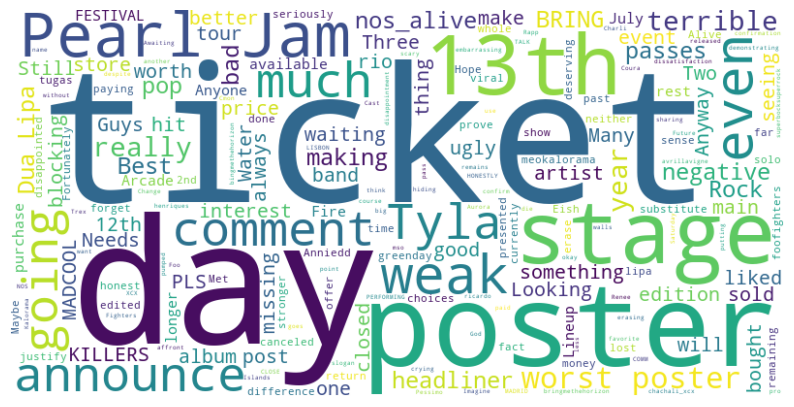

In [2]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df_nos_alive = pd.read_csv('comments_analysis_nos_alive.csv')

# Combine all comments into a single string
all_comments = ' '.join(df_nos_alive['Translated Comment'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(all_comments)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

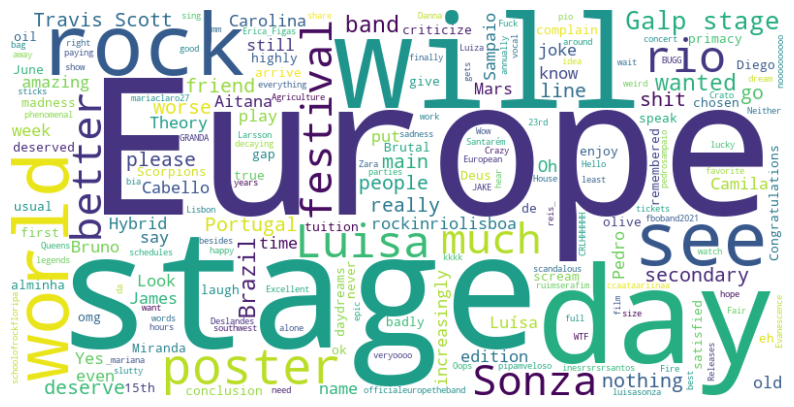

In [3]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df_nos_alive = pd.read_csv('comments_analysis_RIR.csv')

# Combine all comments into a single string
all_comments = ' '.join(df_nos_alive['Translated Comment'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(all_comments)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

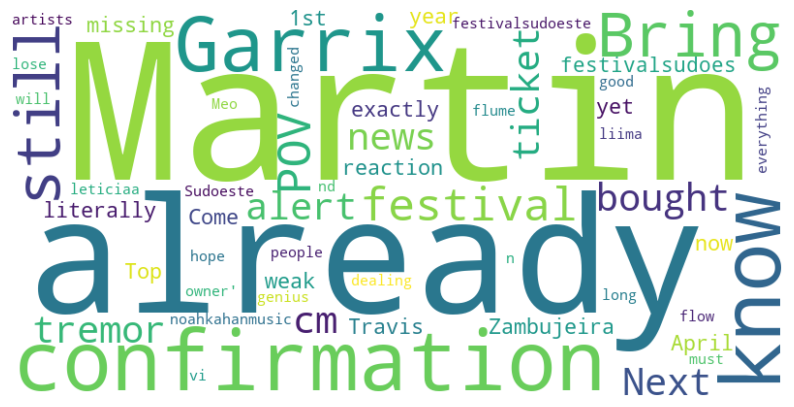

In [4]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df_nos_alive = pd.read_csv('comments_analysis_sudoeste.csv')

# Combine all comments into a single string
all_comments = ' '.join(df_nos_alive['Translated Comment'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(all_comments)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

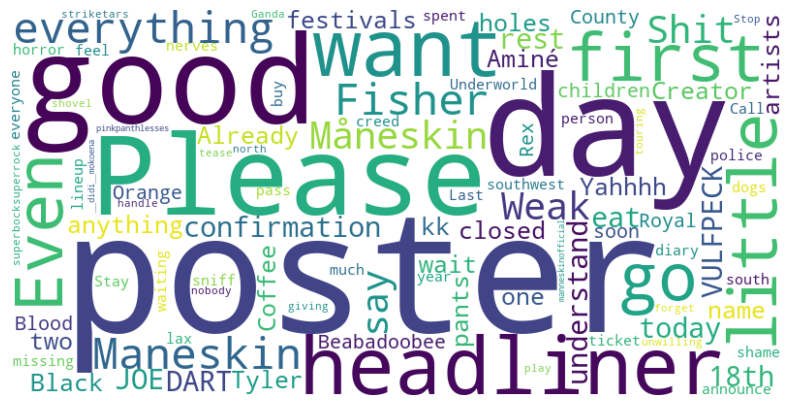

In [5]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df_nos_alive = pd.read_csv('comments_analysis_sbsr.csv')

# Combine all comments into a single string
all_comments = ' '.join(df_nos_alive['Translated Comment'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(all_comments)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

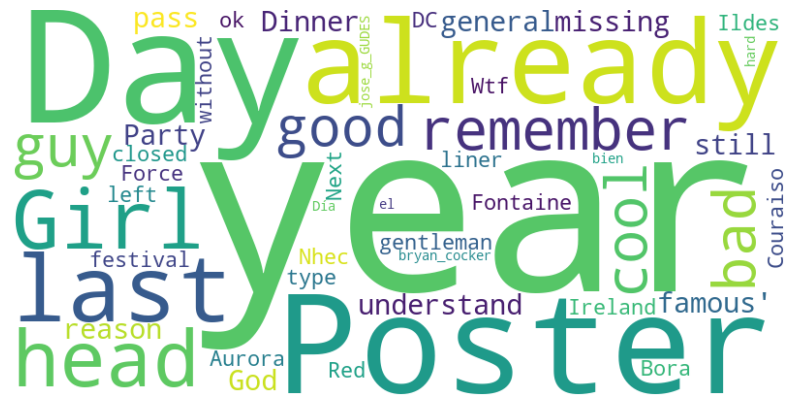

In [6]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df_nos_alive = pd.read_csv('comments_analysis_vodafone.csv')

# Combine all comments into a single string
all_comments = ' '.join(df_nos_alive['Translated Comment'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(all_comments)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

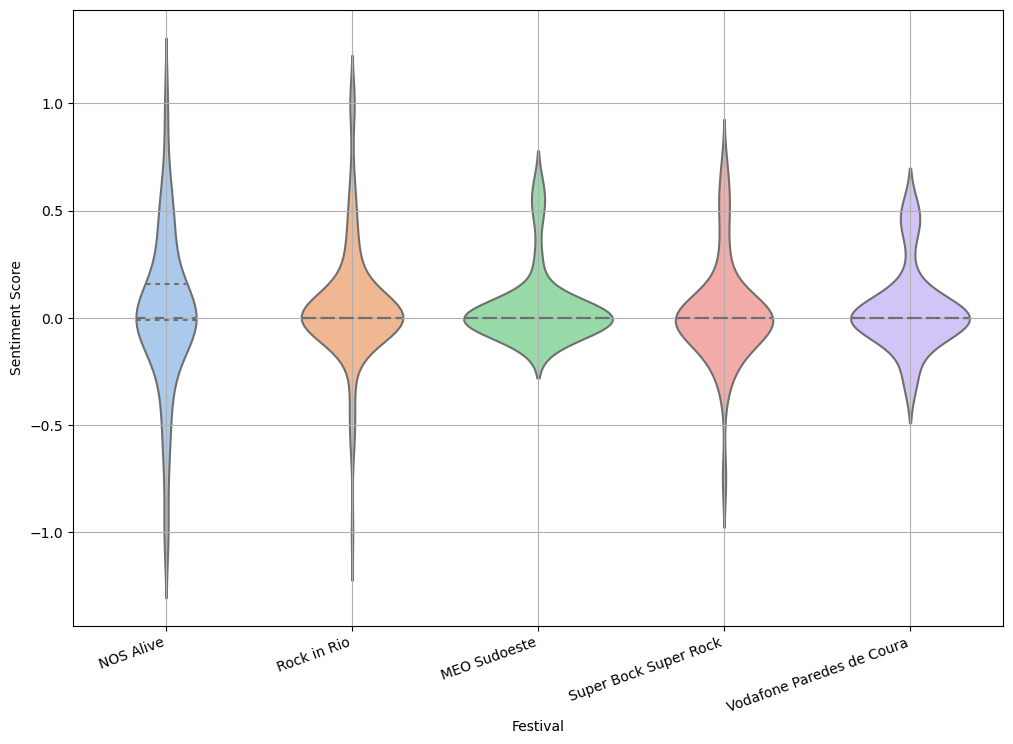

In [3]:
# Violin plot visualization of the sentiment scores of all the comments of each festival

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_nos_alive = pd.read_csv('comments_analysis_nos_alive.csv')
df_rock_in_rio = pd.read_csv('comments_analysis_RIR.csv')
df_sudoeste = pd.read_csv('comments_analysis_sudoeste.csv')
df_sbsr = pd.read_csv('comments_analysis_sbsr.csv')
df_vodafone = pd.read_csv('comments_analysis_vodafone.csv')

# Add a 'Festival' column to each dataframe to assign the festival name to each comment
df_nos_alive['Festival'] = 'NOS Alive'
df_rock_in_rio['Festival'] = 'Rock in Rio'
df_sudoeste['Festival'] = 'MEO Sudoeste'
df_sbsr['Festival'] = 'Super Bock Super Rock'
df_vodafone['Festival'] = 'Vodafone Paredes de Coura'

# Merge all dataframes into one
df = pd.concat([df_nos_alive, df_rock_in_rio, df_sudoeste, df_sbsr, df_vodafone])

palette = sns.color_palette('pastel')
colors = [palette[0], palette[1], palette[2], palette[3], palette[4]]

# Do the violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='Festival', y='Sentiment Score', data=df, palette=palette, inner='quartile')
plt.xlabel('Festival')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=20, ha='right')
plt.grid(True)
plt.show()

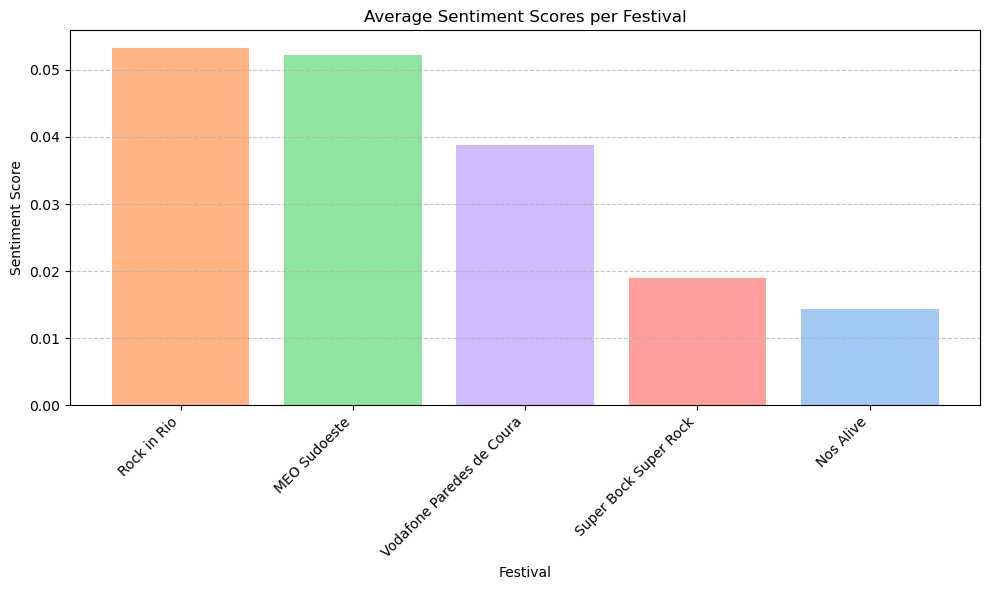

In [9]:
# Visualization of the average sentiment scores for each festival

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_nos_alive = pd.read_csv('comments_analysis_nos_alive.csv')
df_rock_in_rio = pd.read_csv('comments_analysis_RIR.csv')
df_sbsr = pd.read_csv('comments_analysis_sbsr.csv')
df_sudoeste = pd.read_csv('comments_analysis_sudoeste.csv')
df_vodafone = pd.read_csv('comments_analysis_vodafone.csv')

# Calculate the average sentiment scores for each festival
avg_sentiment = {
    'Nos Alive': df_nos_alive['Sentiment Score'].mean(),
    'Rock in Rio': df_rock_in_rio['Sentiment Score'].mean(),
    'Super Bock Super Rock': df_sbsr['Sentiment Score'].mean(),
    'MEO Sudoeste': df_sudoeste['Sentiment Score'].mean(),
    'Vodafone Paredes de Coura': df_vodafone['Sentiment Score'].mean()
}

# Order the festivals by their average sentiment scores (highest to lowest)
avg_sentiment_sorted = dict(sorted(avg_sentiment.items(), key=lambda x: x[1], reverse=True))

palette = sns.color_palette('pastel')
colors = [palette[1], palette[2], palette[4], palette[3], palette[0]]

# Do a bar plot for the average sentiment scores
plt.figure(figsize=(10, 6))
plt.bar(avg_sentiment_sorted.keys(), avg_sentiment_sorted.values(), color=colors)
plt.title('Average Sentiment Scores per Festival')
plt.xlabel('Festival')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()